# Init SELU Stats
We will test ```n``` layer ```SELU``` testing theit activation statistics.

In [1]:
from SELU_NN.SELU import *

In [2]:
def get_data(num_in, method='kaiming'):
    x, b = torch.randn(num_in), torch.zeros(num_in)
    
    fan_in, fan_out = num_in, num_in
    weights = Weight_Init(fan_in, fan_out)
    
    if method=='kaiming': w = weights.kaiming()
    elif method=='pytorch': w = weights.pytorch()
    elif method=='xaiver': w = weights.xavier()
    elif method=='kaiming2': w = weights.kaiming2()
    elif method=='seluinit': w = weights.seluinit()
    else: w = weights.randn()
        
    return x, w, b

def test_model(num_layers=1, num_in=512, method='kaiming'):
    data = get_data(num_in, method)
    x = data[0]
    model = Model_Optimized(data)
    return model(x, num_layers, plot_stats=True)

In [10]:
def selu_normal_(tensor, mode1='fan_in', mode2='fan_out'):
    fan_in = _calculate_correct_fan(tensor, mode1)
    fan_out = _calculate_correct_fan(tensor, mode2)
    with torch.no_grad():
        return torch.randn(fan_in, fan_out) / math.sqrt(1/fan_in)
    
nn.init.selu_normal_ = selu_normal_

In [12]:
nn.init.selu_normal_??

Signature: nn.init.selu_normal_(tensor, mode1='fan_in', mode2='fan_out')
Docstring: <no docstring>
Source:   
def selu_normal_(tensor, mode1='fan_in', mode2='fan_out'):
    fan_in = _calculate_correct_fan(tensor, mode1)
    fan_out = _calculate_correct_fan(tensor, mode2)
    with torch.no_grad():
        return torch.randn(fan_in, fan_out) / math.sqrt(1/fan_in)
File:      c:\users\dmber\documents\daedalus\<ipython-input-10-f817ddc61e46>
Type:      function


Iteration: 1
Initial Activation Stats: (tensor(-0.0049), tensor(0.9833))
Final Activation Stats: (tensor(0.0102), tensor(1.2853))
Iteration: 10
Initial Activation Stats: (tensor(0.0125), tensor(1.0506))
Final Activation Stats: (tensor(1.2145), tensor(3.4444))
Iteration: 100
Initial Activation Stats: (tensor(0.0178), tensor(1.0133))
Final Activation Stats: (tensor(13.5360), tensor(21.9163))


((1, (tensor(-0.0049), tensor(0.9833)), (tensor(0.0102), tensor(1.2853))),
 (10, (tensor(0.0125), tensor(1.0506)), (tensor(1.2145), tensor(3.4444))),
 (100, (tensor(0.0178), tensor(1.0133)), (tensor(13.5360), tensor(21.9163))))

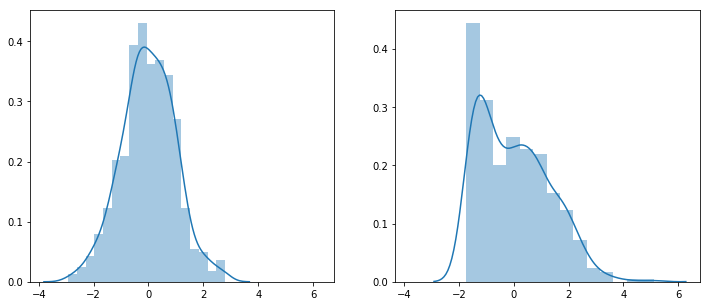

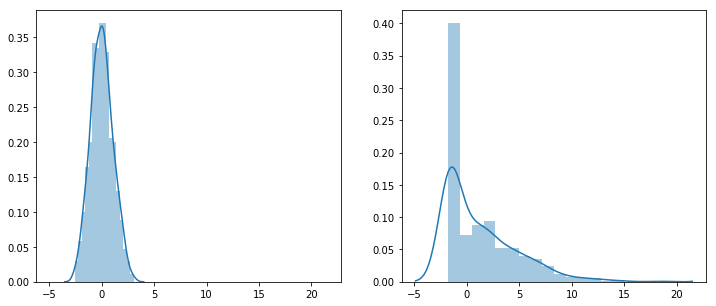

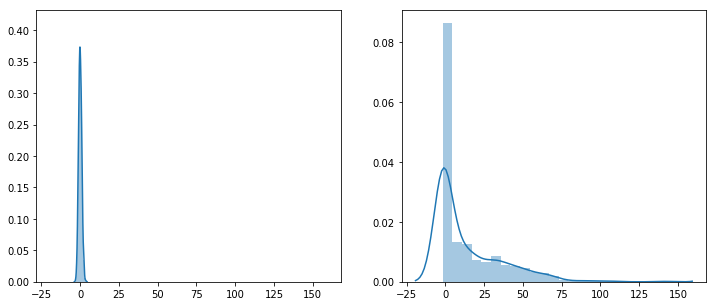

In [3]:
"""
kaiming
"""
test_model(), test_model(num_layers=10), test_model(num_layers=100)

Iteration: 1
Initial Activation Stats: (tensor(0.0125), tensor(0.9697))
Final Activation Stats: (tensor(-0.0846), tensor(0.9485))
Iteration: 10
Initial Activation Stats: (tensor(0.0055), tensor(0.9747))
Final Activation Stats: (tensor(0.0286), tensor(0.9987))
Iteration: 1000
Initial Activation Stats: (tensor(-0.0670), tensor(0.9441))
Final Activation Stats: (tensor(0.0421), tensor(1.0747))


((1, (tensor(0.0125), tensor(0.9697)), (tensor(-0.0846), tensor(0.9485))),
 (10, (tensor(0.0055), tensor(0.9747)), (tensor(0.0286), tensor(0.9987))),
 (1000, (tensor(-0.0670), tensor(0.9441)), (tensor(0.0421), tensor(1.0747))))

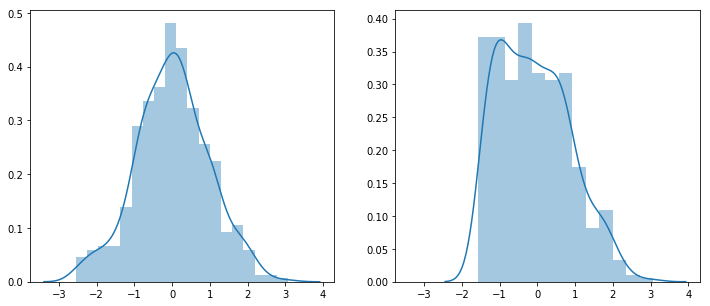

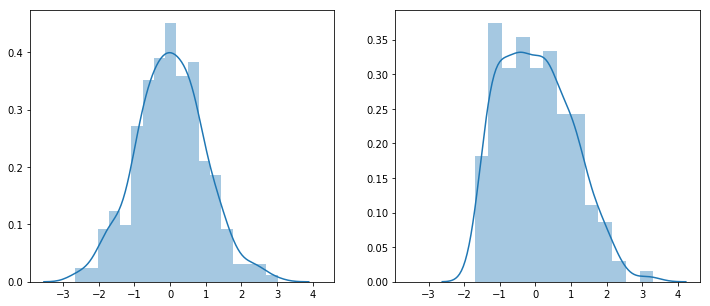

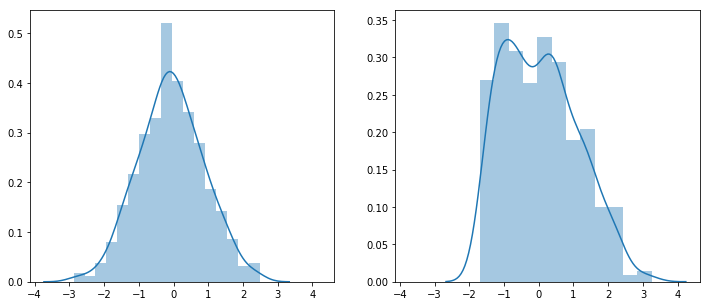

In [4]:
"""
kaiming2
(1./fan_in)
"""
test_model(method='kaiming2'), test_model(num_layers=10, method='kaiming2'), test_model(num_layers=1000, method='kaiming2')

Iteration: 1
Initial Activation Stats: (tensor(0.0301), tensor(1.0526))
Final Activation Stats: (tensor(0.1055), tensor(1.0045))
Iteration: 10
Initial Activation Stats: (tensor(-0.0086), tensor(1.0243))
Final Activation Stats: (tensor(0.0232), tensor(0.9589))
Iteration: 1000
Initial Activation Stats: (tensor(-0.0969), tensor(0.9761))
Final Activation Stats: (tensor(-0.0568), tensor(1.0014))


((1, (tensor(0.0301), tensor(1.0526)), (tensor(0.1055), tensor(1.0045))),
 (10, (tensor(-0.0086), tensor(1.0243)), (tensor(0.0232), tensor(0.9589))),
 (1000, (tensor(-0.0969), tensor(0.9761)), (tensor(-0.0568), tensor(1.0014))))

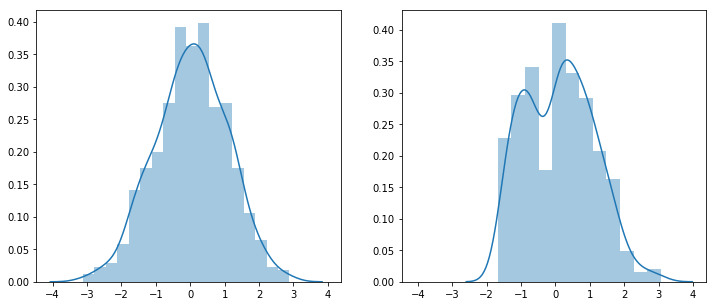

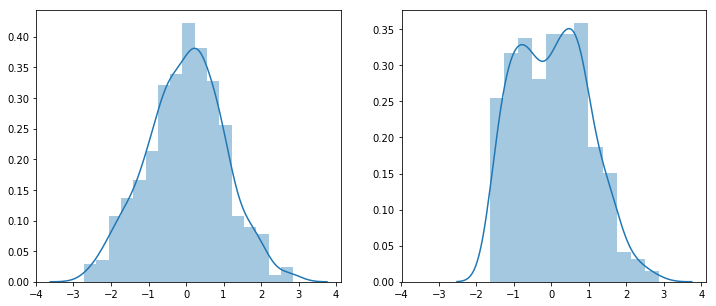

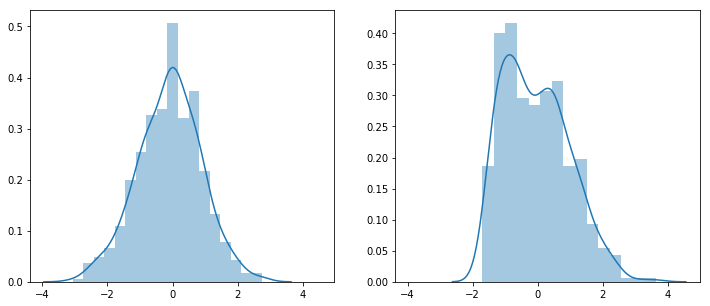

In [5]:
"""
seluinit
(/fan_in)
"""
test_model(method='seluinit'), test_model(num_layers=10, method='seluinit'), test_model(num_layers=1000, method='seluinit')

Iteration: 1
Initial Activation Stats: (tensor(0.0322), tensor(1.0417))
Final Activation Stats: (tensor(0.0709), tensor(1.3588))
Iteration: 10
Initial Activation Stats: (tensor(0.0134), tensor(0.9685))
Final Activation Stats: (tensor(1.3843), tensor(3.9327))
Iteration: 100
Initial Activation Stats: (tensor(-0.0523), tensor(0.9901))
Final Activation Stats: (tensor(1533857.), tensor(2178825.))


((1, (tensor(0.0322), tensor(1.0417)), (tensor(0.0709), tensor(1.3588))),
 (10, (tensor(0.0134), tensor(0.9685)), (tensor(1.3843), tensor(3.9327))),
 (100,
  (tensor(-0.0523), tensor(0.9901)),
  (tensor(1533857.), tensor(2178825.))))

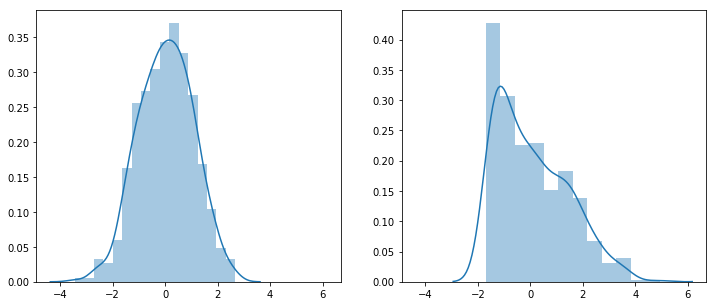

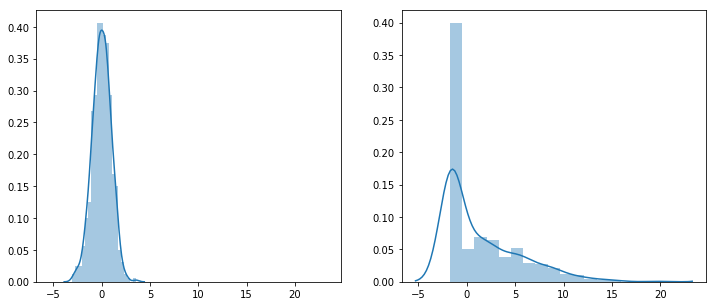

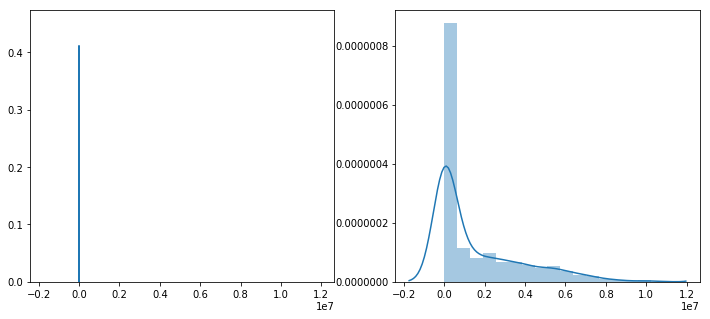

In [3]:
"""
pytorch
init.kaiming_uniform_((fan_in, fan_out), a=math.sqrt(5))
"""
test_model(method='pytorch'), test_model(num_layers=10, method='pytorch'), test_model(num_layers=100, method='pytorch')

In [3]:
"""
pytorch
init.kaiming_uniform_((fan_in, fan_out), a=math.sqrt(5))
"""
test_model(method='pytorch'), test_model(num_layers=10, method='pytorch'), test_model(num_layers=100, method='pytorch')

ValueError: Unsupported nonlinearity SeLU